# Ensemble - Majority Voting

## References

https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

## Import Python Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.utils import resample

## Global Variables

In [211]:
# random state 
random_state = 4781
# random_state = 7644

# colors
c_scale = 256
c1 = (1, 1, 1) # grey
c2 = (1, 0, 0) # red
c3 = (181/c_scale, 204/c_scale, 6/c_scale) # yellow
c4 = (6/c_scale, 122/c_scale, 204/c_scale) # blue
c5 = (0, 0, 0) # black

## Import Dataset

In [212]:

# Source: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X01: school	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# X02: sex	student's sex (binary: 'F' - female or 'M' - male)
# X03: age	student's age (numeric: from 15 to 22)
# X04: address	student's home address type (binary: 'U' - urban or 'R' - rural)
# X05: famsize	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# X06: Pstatus	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
# X06: Medu	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# X07: Fedu	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# X08: Mjob	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# X09: Fjob	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# X10: reason	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# X11: guardian	student's guardian (nominal: 'mother', 'father' or 'other')
# X12: traveltime	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# X13: studytime	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# X14: failures	number of past class failures (numeric: n if 1<=n<3, else 4)
# X15: schoolsup	extra educational support (binary: yes or no)
# X16: famsup	family educational support (binary: yes or no)
# X17: paid	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# X18: activities	extra-curricular activities (binary: yes or no)
# X19: nursery	attended nursery school (binary: yes or no)
# X20: higher	wants to take higher education (binary: yes or no)
# X21: internet	Internet access at home (binary: yes or no)
# X22: romantic	with a romantic relationship (binary: yes or no)
# X23: famrel	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# X24: freetime	free time after school (numeric: from 1 - very low to 5 - very high)
# X25: goout	going out with friends (numeric: from 1 - very low to 5 - very high)
# X26: Dalc	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# X27: Walc	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# X28: health	current health status (numeric: from 1 - very bad to 5 - very good)
# X29: absences	number of school absences (numeric: from 0 to 93)
#   y: Grade: 
#   ----------
#       G1	first period grade (numeric: from 0 to 20)
#       G2	second period grade (numeric: from 0 to 20)
#       G3	final grade (numeric: from 0 to 20, output target

In [213]:
# load dataset from github
filepath0 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/maths.csv'
filepath1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/portuguese.csv'
df0_0 = pd.read_csv(filepath0, header = 0)
df0_0["subject"] = 'maths'
df0_1 = pd.read_csv(filepath1, header = 0)
df0_1["subject"] = 'portuguese'

df0 = pd.concat([df0_0, df0_1], ignore_index = True)
df0.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


In [214]:
# identify X_cols and y_col
all_cols = df0.columns.values
Y_cols = ['G1','G2','G3']
cond1 = ~np.isin(all_cols, Y_cols)
X_cols = all_cols[cond1]
X_cols

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'subject'], dtype=object)

In [215]:
# standardize column names
df1 = df0.copy()
zeros_x = len(str(len(X_cols)))
zeros_y = len(str(len(Y_cols)))

new_all_cols = all_cols

temp_x = (np.arange(0, len(X_cols)) + 1).astype('str')
temp_y = (np.arange(0, len(Y_cols)) + 1).astype('str')

new_Y_cols = ['Y' + i.zfill(zeros_y) for i in temp_y]
new_X_cols = ['X' + i.zfill(zeros_x) for i in temp_x]

new_all_cols[cond1] = new_X_cols
new_all_cols[~cond1] = new_Y_cols

df1.columns = new_all_cols

df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X25,X26,X27,X28,X29,X30,Y1,Y2,Y3,X31
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


In [216]:
# check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X01     1044 non-null   object
 1   X02     1044 non-null   object
 2   X03     1044 non-null   int64 
 3   X04     1044 non-null   object
 4   X05     1044 non-null   object
 5   X06     1044 non-null   object
 6   X07     1044 non-null   int64 
 7   X08     1044 non-null   int64 
 8   X09     1044 non-null   object
 9   X10     1044 non-null   object
 10  X11     1044 non-null   object
 11  X12     1044 non-null   object
 12  X13     1044 non-null   int64 
 13  X14     1044 non-null   int64 
 14  X15     1044 non-null   int64 
 15  X16     1044 non-null   object
 16  X17     1044 non-null   object
 17  X18     1044 non-null   object
 18  X19     1044 non-null   object
 19  X20     1044 non-null   object
 20  X21     1044 non-null   object
 21  X22     1044 non-null   object
 22  X23     1044 non-null   

In [217]:
# describe data
df1.describe()

,X03,X07,X08,X13,X14,X15,X24,X25,X26,X27,X28,X29,X30,Y1,Y2,Y3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [218]:
# check missing values
df1.isna().sum()

X01    0
X02    0
X03    0
X04    0
X05    0
X06    0
X07    0
X08    0
X09    0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
Y1     0
Y2     0
Y3     0
X31    0
dtype: int64

## Data Cleaning and Transformation

In [219]:
df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X25,X26,X27,X28,X29,X30,Y1,Y2,Y3,X31
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


In [221]:
# response column
# y_col = new_Y_cols[0] # G1
# y_col = new_Y_cols[1] # G2
y_col = new_Y_cols[2] # G3 - we really care about this one
y_col

'Y3'

In [222]:
# predictor columns
X_cols = df1.columns[cond1]
X_cols

Index(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31'],
      dtype='object')

In [223]:
# update df1
df1 = pd.concat([df1[X_cols], df1[y_col]], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X01     1044 non-null   object
 1   X02     1044 non-null   object
 2   X03     1044 non-null   int64 
 3   X04     1044 non-null   object
 4   X05     1044 non-null   object
 5   X06     1044 non-null   object
 6   X07     1044 non-null   int64 
 7   X08     1044 non-null   int64 
 8   X09     1044 non-null   object
 9   X10     1044 non-null   object
 10  X11     1044 non-null   object
 11  X12     1044 non-null   object
 12  X13     1044 non-null   int64 
 13  X14     1044 non-null   int64 
 14  X15     1044 non-null   int64 
 15  X16     1044 non-null   object
 16  X17     1044 non-null   object
 17  X18     1044 non-null   object
 18  X19     1044 non-null   object
 19  X20     1044 non-null   object
 20  X21     1044 non-null   object
 21  X22     1044 non-null   object
 22  X23     1044 non-null   

In [224]:
# get unique y_labels
y_labels = np.sort(df1[y_col].unique())
y_labels = {y_labels[i]: i for i in range(len(y_labels))}
# y_labels = {i:y_labels[i] for i in range(len(y_labels))}
y_labels

{0: 0,
 1: 1,
 4: 2,
 5: 3,
 6: 4,
 7: 5,
 8: 6,
 9: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18}

In [225]:
# rename y_labels
df1[y_col] = df1[y_col].replace(y_labels)
df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,Y3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,maths,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,maths,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,maths,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,maths,13
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,maths,8


In [226]:
# encode categorical values to numerical values
le = LabelEncoder()

categorical_cols = df1[X_cols].select_dtypes("object").columns
df1[categorical_cols] = df1[categorical_cols].apply(le.fit_transform)

df1.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,Y3
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,0,4
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,0,4
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,0,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,0,13
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,0,8


In [227]:
# check label distribution
temp_labels = list(y_labels.values())
cond_list = []
count_list = []
for i in np.arange(len(temp_labels)):
  # condition for rows matching response label
  # print(i)
  x = temp_labels[i]
  temp_cond = list(df1[y_col] == x)
  cond_list.append(temp_cond)
  # print(cond_list)
  # get total label count
  temp_n = np.sum(cond_list[i])
  # print(temp_n)
  count_list.append(temp_n)
  
# max label count
n_max = np.max(count_list)
# index where max value occurs
i_max = np.where(count_list == n_max)[0][0]
# index where max value does not occurs
i_notmax = np.where(count_list != n_max)[0]

print(temp_labels)
print(count_list)
print(n_max)
print(i_max)
print(i_notmax)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[53, 1, 1, 8, 18, 19, 67, 63, 153, 151, 103, 113, 90, 82, 52, 35, 27, 7, 1]
153
8
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18]


In [228]:
# upsample minority labels
df_upsample_list = []
for i in i_notmax:
  # print(i)
  # get dataframe rows where label exsists
  cond = cond_list[i]
  # print(cond)
  df_temp = df1.iloc[cond,:]
  # print(df_temp.info())
  
  # determine amount to upsample 
  n_diff = n_max - count_list[i]
  # print(n_diff)
  
  # generate upsample dataframe 
  df_upsample_temp = resample(
    df_temp,
    replace = True,
    n_samples = n_diff,
    random_state = random_state
  )
  df_upsample_list.append(df_upsample_temp)

# put all dataframes in df_upsample_list into one
df_upsample_list = pd.concat(df_upsample_list, ignore_index = True)

# update df1 with upsampled dataframe
df1 = pd.concat([df1, df_upsample_list], ignore_index = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X01     2907 non-null   int32
 1   X02     2907 non-null   int32
 2   X03     2907 non-null   int64
 3   X04     2907 non-null   int32
 4   X05     2907 non-null   int32
 5   X06     2907 non-null   int32
 6   X07     2907 non-null   int64
 7   X08     2907 non-null   int64
 8   X09     2907 non-null   int32
 9   X10     2907 non-null   int32
 10  X11     2907 non-null   int32
 11  X12     2907 non-null   int32
 12  X13     2907 non-null   int64
 13  X14     2907 non-null   int64
 14  X15     2907 non-null   int64
 15  X16     2907 non-null   int32
 16  X17     2907 non-null   int32
 17  X18     2907 non-null   int32
 18  X19     2907 non-null   int32
 19  X20     2907 non-null   int32
 20  X21     2907 non-null   int32
 21  X22     2907 non-null   int32
 22  X23     2907 non-null   int32
 23  X24     2907 

In [367]:
# normalize all X_cols
df2 = df1.copy()
# norm = StandardScaler()
norm = MinMaxScaler()
# norm = RobustScaler()
df2[X_cols] = norm.fit_transform(df2[X_cols])

df2.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,Y3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.0,4
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.0,4
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.0,8
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.0,13
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.0,8


## Visualize Dataset

In [368]:
# figure setup
fig_cols = 4
fig_rows = np.ceil(len(X_cols)/fig_cols).astype('int')
y_max = np.round(df2[X_cols].max().max(), 0)
y_min = np.round(df2[X_cols].min().min(), 0)
n_levels = df2[y_col].unique().size
palette1 = [c1 for i in range(n_levels)]
palette2 = [c3, c4]
figsize = (20, 50)

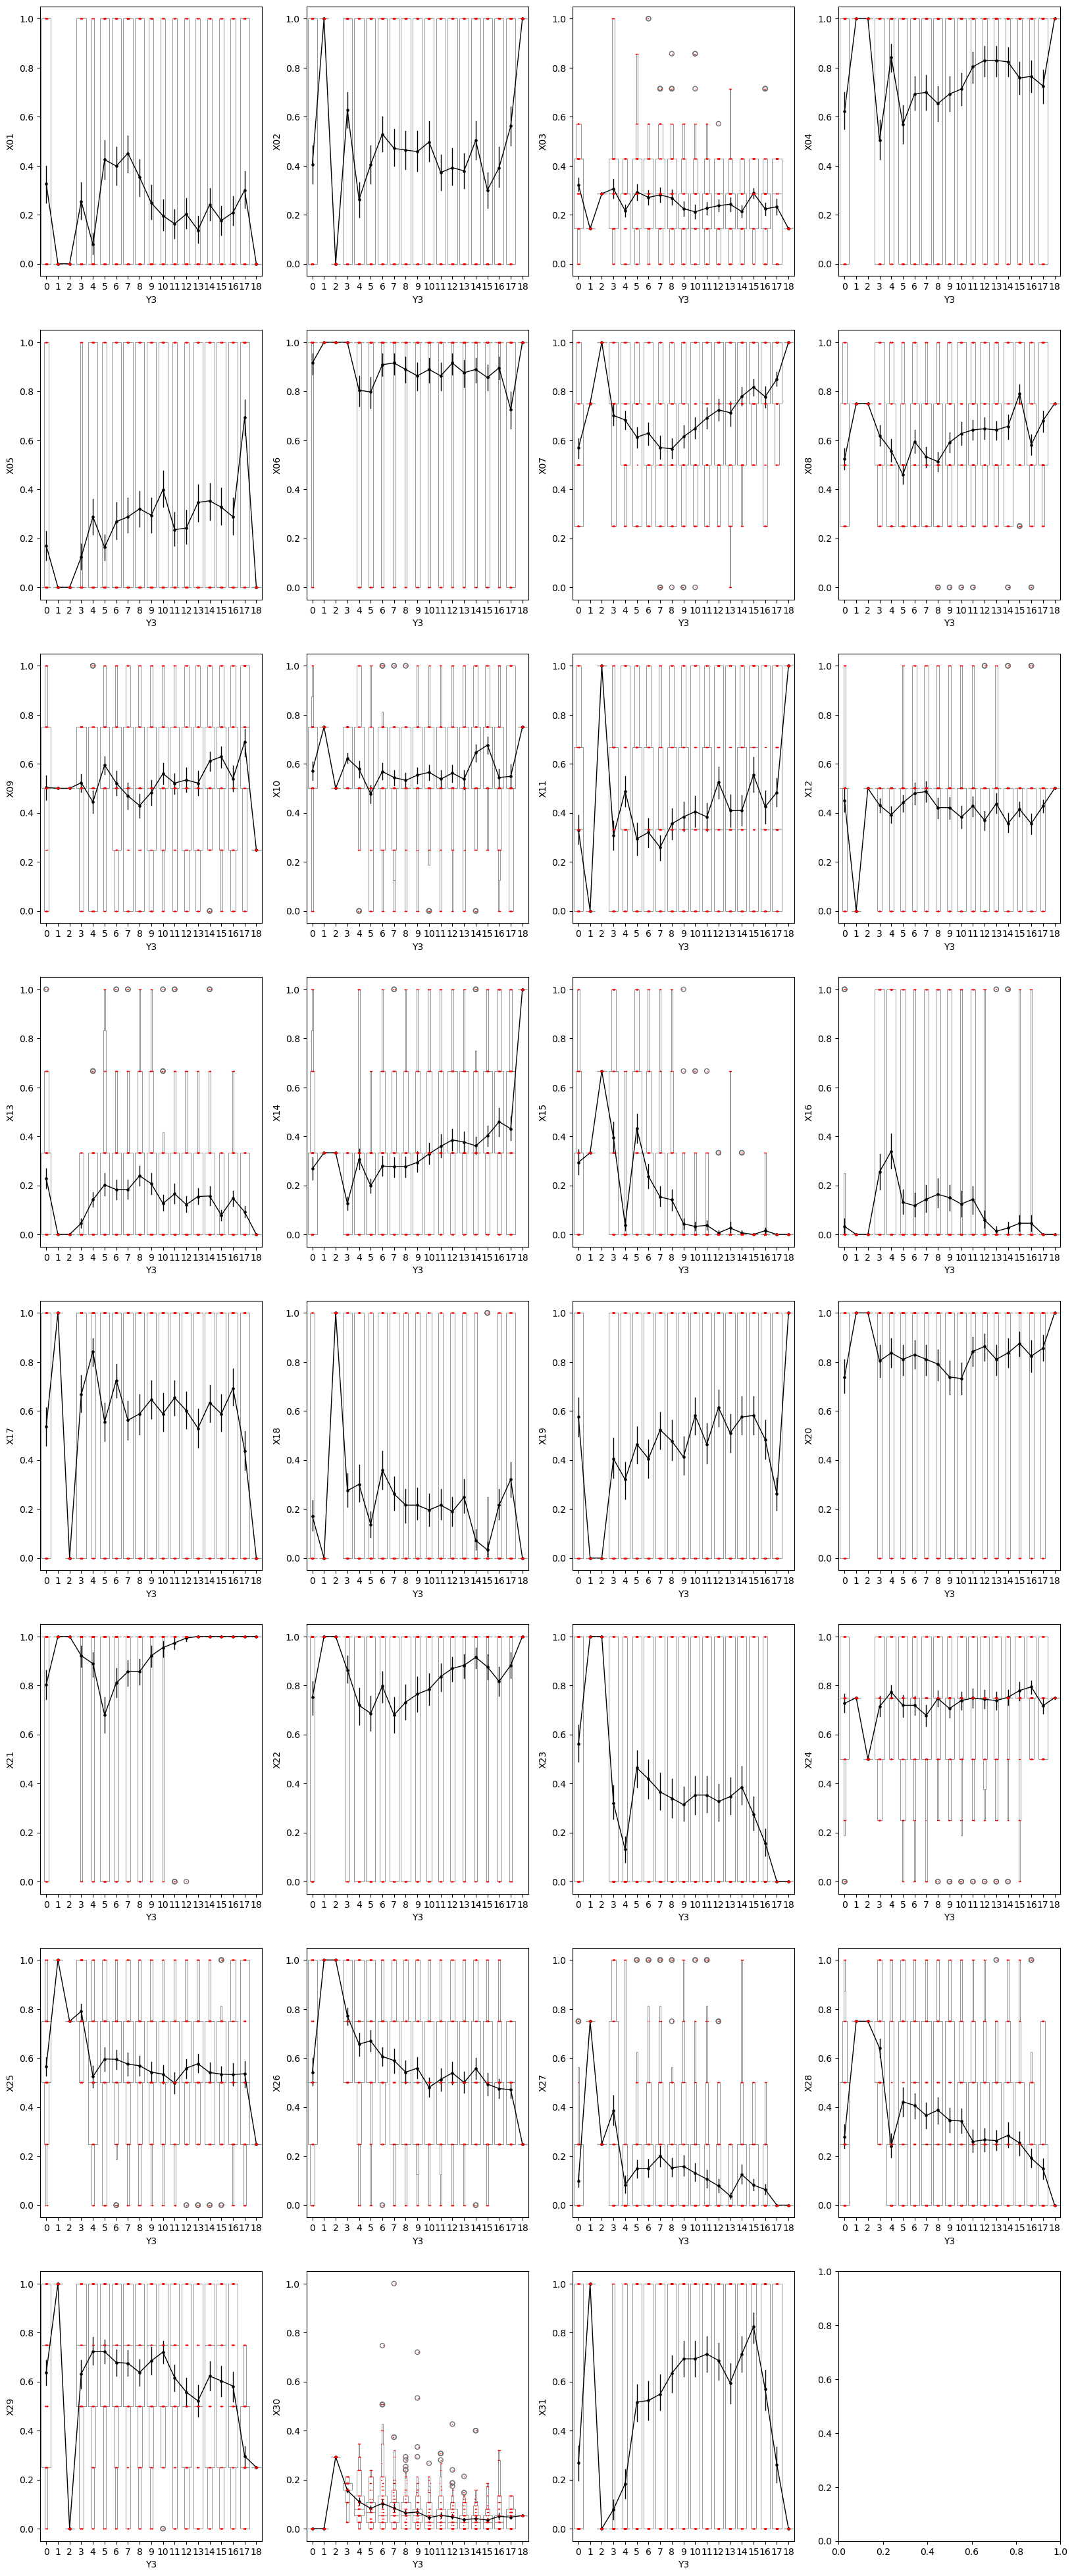

In [369]:
# subplot of y vs each X (stripplot + violinplot + boxenplot)
f1, axes = plt.subplots(fig_rows, fig_cols, figsize = figsize)
itr = 0
for x in X_cols:
  row = np.floor(itr/fig_cols) 
  row = row.astype('int')
  col = np.mod(itr, fig_cols)
  col = col.astype('int') 
  # print(row)
  # print(col)
  # p1 = sns.violinplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p2 = sns.boxenplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p3 = sns.stripplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c2, size = 1)
  p4 = sns.pointplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c5, linewidth = 1)
  axes[row, col].legend_ = None
  # axes[row, col].set_ylim(y_min, y_max)
  itr = itr + 1

## Feature Selection

### Remove Features Having % Similar Values or More

In [370]:
# porportion similar (p)
p = 1
# porportion dissimilar (q = 1- p)
q = 1 - p

print(p,q)

1 0


In [371]:
# initialize variance threshold model (based on porportion dissimilar)
myfit = VarianceThreshold(q)

In [372]:
# fit model
temp = myfit.fit_transform(df2[X_cols])
temp.shape

(2907, 31)

In [373]:
# get columns that have at least p-similar or q-disimilar values
X_cols_var_threshold = myfit.get_feature_names_out()
X_cols_var_threshold

array(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'X28', 'X29', 'X30', 'X31'], dtype=object)

In [374]:
# update X_cols
X_cols = X_cols_var_threshold
X_cols

array(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'X28', 'X29', 'X30', 'X31'], dtype=object)

### Select Features Using Model Selection Methods

In [375]:
# seperate data into X and y
X = df2[X_cols]
y = np.ravel(df2[y_col])

In [376]:
# estimator model
estimator_model = RandomForestClassifier(
  n_estimators = 20,
  # max_depth = 100,
  criterion = 'gini',
  random_state = random_state
)    

In [377]:
# fit estimmator model
temp = estimator_model.fit(X, y)

In [378]:
# feature importance values
feature_importance = estimator_model.feature_importances_
feature_importance

array([0.01458557, 0.02244761, 0.04537534, 0.01682957, 0.01627981,
       0.01129209, 0.04204243, 0.04236141, 0.04442749, 0.03688668,
       0.0489693 , 0.02704963, 0.02293669, 0.04707665, 0.0333058 ,
       0.01172375, 0.02408926, 0.01966936, 0.02044448, 0.0142099 ,
       0.00809516, 0.01233548, 0.01889153, 0.03804057, 0.05290396,
       0.05030384, 0.03505285, 0.0480212 , 0.04195146, 0.08911565,
       0.0432855 ])

In [379]:
# threshold feature importance
# feature_importance_threshold = np.mean(feature_importance)
feature_importance_threshold = np.median(feature_importance)
# feature_importance_threshold = np.quantile(feature_importance, q = 0.75)
feature_importance_threshold

0.033305799349895214

In [380]:
# initialize SelectFromModel
myfit = SelectFromModel(
  estimator = estimator_model,
  threshold = feature_importance_threshold
)

In [381]:
# fit SelectFromModel
temp = myfit.fit_transform(X, y)

In [382]:
# get columns kept from ensemble - random forest feature selection
X_cols_rf = myfit.get_feature_names_out()
X_cols_rf

array(['X03', 'X07', 'X08', 'X09', 'X10', 'X11', 'X14', 'X15', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31'], dtype=object)

## Train and Test ML Model

In [383]:
# X_cols to include after feature selection
# X_include = X.columns
X_include = X_cols_rf
print(len(X_include))
print(X_include)

16
['X03' 'X07' 'X08' 'X09' 'X10' 'X11' 'X14' 'X15' 'X24' 'X25' 'X26' 'X27'
 'X28' 'X29' 'X30' 'X31']


In [384]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X[X_include], y, 
  stratify = y, shuffle = True, 
  train_size = 0.9, random_state = random_state
)

In [385]:
# classifier: Perceptron
ptron = (
  'ptron',
    Perceptron(
      fit_intercept = True,
      max_iter = 10000,
      eta0 = 1E-7,
      random_state = random_state
    )
)

# classifier: Logistic Regression
lr = (
  'lr',
  LogisticRegression(
    fit_intercept = True,
    max_iter = 10000,
    random_state = random_state
  )
)

# classifier: Support Vector Machine
svc = (
  'svc',
  SVC(
    kernel = 'linear',
    random_state = random_state
  )
)


# classifier: K-Nearest Neighbors
knn = (
  'knn',
  KNeighborsClassifier(
    n_neighbors = 3,
    # metric = "chebyshev",
    # metric = "cityblock",
    # metric = "cosine",
    # metric = "euclidean",
    algorithm = 'auto'
  )
)

# classifier: Naive Bayes
nb = (
  'nb',
  GaussianNB()
)

# classifier: Decision Tree
dtree = (
  'dtree',
  DecisionTreeClassifier(
    criterion = 'gini',
    # min_samples_split = 10,
    random_state = random_state
  )
)

# classifier: Random Forest
rf = (
  'rf',
  RandomForestClassifier(
    criterion = 'gini',
    random_state = random_state
  )
)

# classifier: Gradient Boosting
xgboost = (
  'xgboost',
  GradientBoostingClassifier(
    n_estimators = 1000,
    random_state = random_state
  )
)

# classifier: Bagging
estimator_model = DecisionTreeClassifier(
  random_state = random_state
)
bagging = (
  'bagging',
  BaggingClassifier(
    estimator = estimator_model,
    n_estimators = 10, 
    random_state = random_state
  )
)

# classifier: Adaptive Boosting
estimator_model = RandomForestClassifier(
  random_state = random_state
)
adaboost = (
  'adaboost',
  AdaBoostClassifier(
    estimator = estimator_model, 
    n_estimators = 100,
    random_state = random_state
  )
)


In [386]:
# define models to be used in voting
# estimator_models = [ptron, lr, svc, knn, nb, dtree, rf, bagging, xgboost, adaboost]
# estimator_models = [bagging, xgboost, adaboost]
# estimator_models = [xgboost]
estimator_models = [rf, xgboost]

In [387]:
# initialize Majority Voting
myfit = VotingClassifier(
  estimators = estimator_models,
  voting = "hard"
)

In [388]:
# fit model
temp = myfit.fit(X_train, y_train)

In [389]:
# get predictions on test data
y_hat = myfit.predict(X_test)

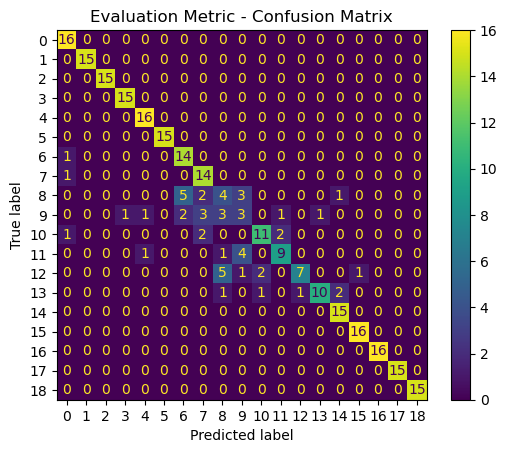

In [390]:
# model evaluation - confusion matrix

# get confusion matrix
cm = confusion_matrix(
  y_true = y_test,
  y_pred = y_hat
)

# show confusion matrix visual
labels = myfit.classes_
p1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
p1.plot()
plt.title('Evaluation Metric - Confusion Matrix')
plt.show()

In [391]:
# model evaluation - recall, precision , F1-score
metric_report = classification_report(y_true = y_test, y_pred = y_hat, output_dict = False, zero_division = 0) 
print(metric_report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       0.94      1.00      0.97        15
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        15
           6       0.67      0.93      0.78        15
           7       0.67      0.93      0.78        15
           8       0.29      0.27      0.28        15
           9       0.27      0.20      0.23        15
          10       0.79      0.69      0.73        16
          11       0.75      0.60      0.67        15
          12       0.88      0.44      0.58        16
          13       0.91      0.67      0.77        15
          14       0.83      1.00      0.91        15
          15       0.94      1.00      0.97        16
          16       1.00      1.00      1.00        16
          17       1.00    